### Most of the codes in this notebook copied from http://www.superdatascience.com/wp-content/uploads/2017/02/Thompson-Sampling.zip  
I have very low knowledge of this, I copied it for future use  
![title](Thompson_vs_UCB.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [2]:
# Selecting Ads randomly
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = data.values[n, ad]
    total_reward = total_reward + int(reward)
print(total_reward)
#Usually between 1100 to 1300

1241


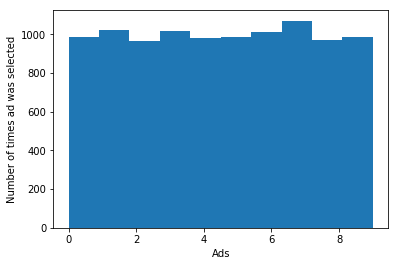

In [3]:
plt.hist(ads_selected)
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

![title](Thompson_Sampling_Baysian_Inference.png)

![title](Thompson_Sampling_Slide.png)

In [4]:
# Selecting as per Thompson
import math
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = data.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

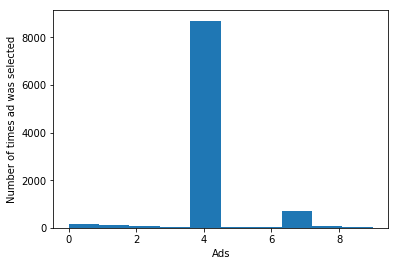

In [5]:
plt.hist(ads_selected)
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

In [6]:
print(total_reward)

2585
